##  Tensorflow 무작정 사용해보기
 - 손글씨를 훈련시켜 숫자를 판별
 - https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
import numpy as np
import matplotlib.pyplot as plt

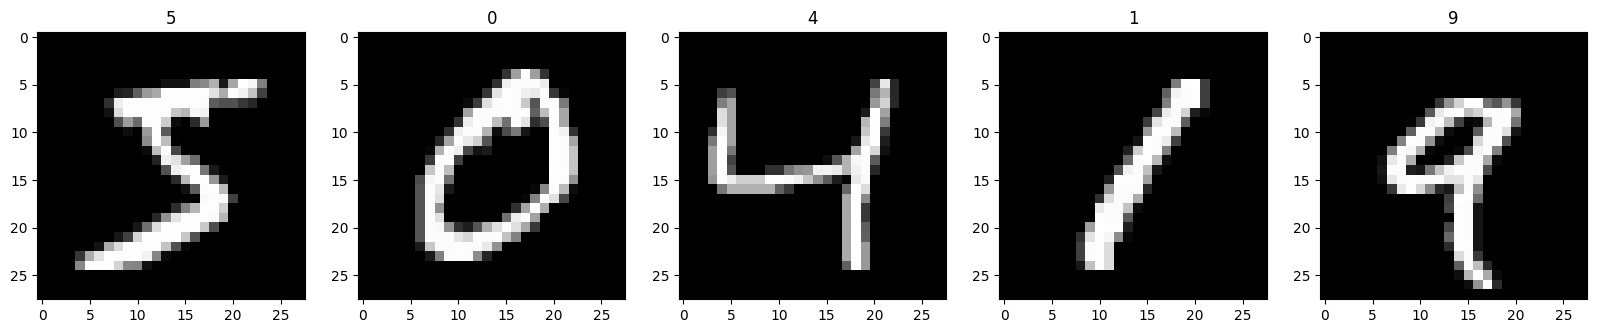

In [5]:
import matplotlib.pyplot as plt

y_train[:3]

def plot(dataX, dataY, num = 10):
    plt.figure(figsize=(20,20))

    for cnt, x in enumerate(dataX[:num]):
        plt.subplot(1,num,cnt+1)
        plt.imshow(x,cmap='gray')
        plt.title(dataY[cnt])

def count(data):
    tmp = np.unique(data,return_counts=True)
    print(tmp)
    plt.figure(figsize=(5,3))
    plt.bar(tmp[0], tmp[1])

plot(x_train, y_train, 5)
# count(y_train)

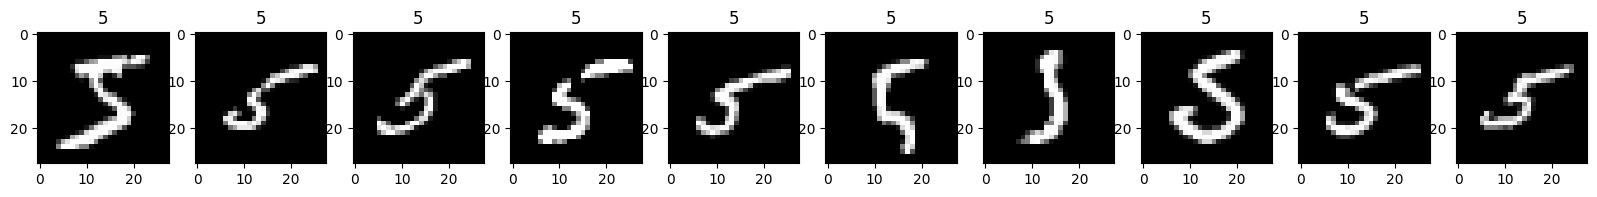

In [6]:
# 숫자 5


def select_N(select_num):
    newX = []
    newY = []
    for x,y in zip(x_train, y_train):
        if y ==select_num:
            newX.append(x)
            newY.append(y)
    plot(newX,newY, 10)

select_N(5)

In [7]:
np.shape(x_train), np.shape(y_train)

((60000, 28, 28), (60000,))

### mnist
 - 크기 (28, 28)
 - 갯수 (60000)
 - 흑백
 - 배경 = 검은색
 - 글자의 위치
 - 0 ~255 / 255로 나눈 값

In [8]:
# 모델제작
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),      # 28*28 크기로, x변수가 784개, np.shape(x_train)
    tf.keras.layers.Dense(128, activation='relu'),      # w가 784개 생성, 그런경우를 128개 만들자
    tf.keras.layers.Dropout(0.2),                       # 784개의 w가 128개의 경우의수로 생성(총생성되는 w는 784*128, 그 중 20%는 0으로)
    tf.keras.layers.Dense(10, activation='softmax')     # 손글씨 이미지를 0,1,2,3...9 중 어떤 숫자인가?
])                                                              ## np.unique(y_train)의 max값 +1 = 10


# 배치사이즈, 오차계산법(경사하강법, 오차역전파), 화면에 보여줄 값 지정
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


# 모델컴파일러에서 모델을 갖고와 순전파와 역전파를 진행하고
# w,b를 계속 갱신하며 모든데이털르 총 epochs 만큼 반복!
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))           # 트레이닝 자료를 이용하여 w,b를 갱신, test는 아직 안함

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2913 - accuracy: 0.9162 - val_loss: 0.1374 - val_accuracy: 0.9589
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1401 - accuracy: 0.9589 - val_loss: 0.1019 - val_accuracy: 0.9692
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1067 - accuracy: 0.9673 - val_loss: 0.0925 - val_accuracy: 0.9713
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0870 - accuracy: 0.9725 - val_loss: 0.0830 - val_accuracy: 0.9745
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0732 - accuracy: 0.9771 - val_loss: 0.0752 - val_accuracy: 0.9780


In [9]:
model.save('c:/data/myMnist.h5')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


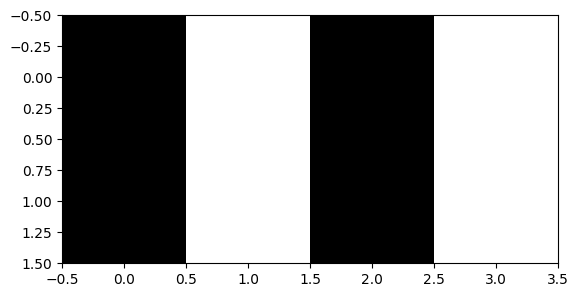

In [11]:
import matplotlib.pyplot as plt
a = [[0,255,0,255],
    [0, 255, 0,255]]

plt.imshow(a, cmap="gray")

In [14]:
# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt
# img = Image.open("C:\Users\user\Downloads\pic.png").resize((224,224)).convert('RGB')
# print(np.shape(img))
# img=np.array(img)
# img = (img/127.5)-1
# img = img.reshape(1,224,224,3)
# np.shape(img)

In [15]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("C:\Users\user\Downloads\converted_keras\keras_model.h5", compile=False)

# Load the labels
# class_names = open("labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32) #모델에 들어갈 dataset 미리 준비

# Replace this with the path to your image
image = Image.open("C:\Users\user\Downloads\pic.png").convert("RGB")
# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
# turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1 #티처블의 스케일링
# Load the image into the array
data[0] = normalized_image_array  #자료셋에 이미지 넣기

# Predicts the model
prediction = model.predict(data) #예측한 결과는 [0의 위치 확률 or 1의 위치 확률 값]
index = np.argmax(prediction) # 가장 큰 값을 갖고 있는 위치 값
# class_name = class_names[index] #label관련
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3683299758.py, line 9)